## Time Series: 


They can be of either fixed frequency or irregular without a fixed unit of time or offset between units

It could be one of the following type:

1. Timestamp, specific instant of time
2. Fixed Periods, the month of January or the full year
3. Intervals of time; indicated by the start and the end timestamp
4. Experiment or elapsed time; each timestamp is a measure of time relative to a particular start time.Pandas supports timedelta, which can be useful way of representing experiment or elapsed time.


The simplest and most widely used kind of time series are those indexed by timestamp.

Python supports data types for date, time and calender-related fuctionality.

In [2]:
from datetime import datetime
import pandas as pd

In [3]:
now = datetime.now()

In [4]:
now  #datetime stores both date and time down to the microsecond.

datetime.datetime(2022, 8, 24, 5, 15, 55, 306684)

In [5]:
now.year, now.month, now.day

(2022, 8, 24)

In [6]:
delta = now - datetime(1982,5,9)  #time delta represents the temporal difference between two datetime objects

In [7]:
delta

datetime.timedelta(days=14717, seconds=18955, microseconds=306684)

In [8]:
delta.days

14717

In [9]:
delta.seconds

18955

In [10]:
from datetime import timedelta
start = datetime(1982,5,9)

start + timedelta(14714)

datetime.datetime(2022, 8, 21, 0, 0)

In [11]:
start + 2 * timedelta(14714) 

datetime.datetime(2062, 12, 3, 0, 0)

# Types: date,time,datetime,timedelta,tzinfo

# Converting between String and Datetime


In [12]:
stamp = datetime(2011, 1, 3)

In [13]:
str(stamp)

'2011-01-03 00:00:00'

In [14]:
stamp.strftime("%Y-%m-%d %H : %M: %S")

'2011-01-03 00 : 00: 00'

In [15]:
now

datetime.datetime(2022, 8, 24, 5, 15, 55, 306684)

In [16]:
stamp = now

In [17]:
str(stamp)

'2022-08-24 05:15:55.306684'

In [18]:
stamp.strftime("%Y - %m - %d %w %H:%M:%S %W  %z")  #%w is the week day, sunday-0  
                                                   #%W is week number

'2022 - 08 - 24 3 05:15:55 34  '

In [19]:
value = stamp.strftime("%F")
value

'2022-08-24'

In [20]:
val = stamp.strftime("%D")
val

'08/24/22'

In [21]:
datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(2022, 8, 24, 0, 0)

In [22]:
datetime.strptime(val, "%m/%d/%y")

datetime.datetime(2022, 8, 24, 0, 0)

In [23]:
val

'08/24/22'

In [24]:
datestrs = ["7/6/11", val]

In [25]:
[datetime.strptime(x, "%m/%d/%y") for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2022, 8, 24, 0, 0)]

In [26]:
from dateutil.parser import parse  #parser.parse method from third party dateutil package
parse(val)

datetime.datetime(2022, 8, 24, 0, 0)

In [27]:
parse("January 31, 2022 10:45 pm")

datetime.datetime(2022, 1, 31, 22, 45)

In [28]:
parse("12/08/22", dayfirst = True)

datetime.datetime(2022, 8, 12, 0, 0)

In [29]:
datestrs

['7/6/11', '08/24/22']

In [30]:
idx = pd.to_datetime(datestrs + [None])

In [31]:
idx[2]   #NaT Not a Time is panda's null value for timestamp data

NaT

In [32]:
pd.isnull(idx)

array([False, False,  True])

## Time Series Basics

In [33]:
from datetime import datetime
import numpy as np

In [34]:
dates = [datetime(2022, 1, 2), datetime(2022, 1, 5),
        datetime(2022, 1, 7), datetime(2022, 1, 8),
        datetime(2022, 1, 10), datetime(2022, 1, 12)]

In [35]:
ts = pd.Series(np.random.randn(6), index = dates)

In [36]:
ts         # the datetime objects are put as DatetimeIndex

2022-01-02    1.454816
2022-01-05   -0.760971
2022-01-07    1.598721
2022-01-08    0.011545
2022-01-10   -0.332493
2022-01-12   -0.341167
dtype: float64

In [37]:
ts + ts[::2]

2022-01-02    2.909632
2022-01-05         NaN
2022-01-07    3.197442
2022-01-08         NaN
2022-01-10   -0.664986
2022-01-12         NaN
dtype: float64

In [38]:
ts.index.dtype  #pandas stores Datetime using NumPy's datetime64 at the nanosecond resolution

dtype('<M8[ns]')

In [39]:
#The scalar values of DatetimeIndex are pandas Timestamp objects
stamp = ts.index[0]

In [40]:
stamp

Timestamp('2022-01-02 00:00:00')

In [41]:
ts[stamp]

1.454816184837967

In [42]:
ts["2022/1/12"]

-0.34116691210358985

In [43]:
ts["20220110"]

-0.3324929671361567

In [44]:
longer_ts = pd.Series(np.random.randn(1000), index= pd.date_range("1-1-2020", periods = 1000))

In [45]:
longer_ts.head()

2020-01-01    0.839056
2020-01-02    0.085655
2020-01-03    1.054385
2020-01-04   -0.860902
2020-01-05    0.142923
Freq: D, dtype: float64

In [46]:
longer_ts.tail()

2022-09-22    0.620974
2022-09-23   -1.139623
2022-09-24    0.432192
2022-09-25   -0.751190
2022-09-26    1.212441
Freq: D, dtype: float64

In [47]:
longer_ts["2021"]   #period of a year 2021

2021-01-01   -1.178759
2021-01-02   -0.588893
2021-01-03    0.058944
2021-01-04    0.554553
2021-01-05    0.833100
                ...   
2021-12-27   -0.311159
2021-12-28   -0.025263
2021-12-29    0.806082
2021-12-30    1.367425
2021-12-31    1.278645
Freq: D, Length: 365, dtype: float64

In [48]:
longer_ts['2021-05']

2021-05-01    0.407935
2021-05-02    0.163943
2021-05-03    2.197650
2021-05-04   -0.346411
2021-05-05    0.743952
2021-05-06    0.477170
2021-05-07   -0.092599
2021-05-08    0.235206
2021-05-09    1.087034
2021-05-10    0.136505
2021-05-11   -0.152896
2021-05-12   -0.272117
2021-05-13    0.933479
2021-05-14    0.193556
2021-05-15   -1.021357
2021-05-16    0.082910
2021-05-17   -0.794871
2021-05-18    1.178547
2021-05-19    0.539038
2021-05-20   -0.881894
2021-05-21   -2.051674
2021-05-22    1.602419
2021-05-23   -1.126151
2021-05-24   -1.144456
2021-05-25    0.322787
2021-05-26   -1.453902
2021-05-27    0.157514
2021-05-28    0.245947
2021-05-29   -0.550072
2021-05-30   -1.791281
2021-05-31    0.213090
Freq: D, dtype: float64

In [49]:
longer_ts[datetime(2021,12,31):]

2021-12-31    1.278645
2022-01-01   -0.925450
2022-01-02    0.369799
2022-01-03   -0.058765
2022-01-04    1.178721
                ...   
2022-09-22    0.620974
2022-09-23   -1.139623
2022-09-24    0.432192
2022-09-25   -0.751190
2022-09-26    1.212441
Freq: D, Length: 270, dtype: float64

In [50]:
ts

2022-01-02    1.454816
2022-01-05   -0.760971
2022-01-07    1.598721
2022-01-08    0.011545
2022-01-10   -0.332493
2022-01-12   -0.341167
dtype: float64

In [51]:
ts.truncate(after = "1/9/2022")

2022-01-02    1.454816
2022-01-05   -0.760971
2022-01-07    1.598721
2022-01-08    0.011545
dtype: float64

In [52]:
ts.truncate(before = "1/5/2022")

2022-01-05   -0.760971
2022-01-07    1.598721
2022-01-08    0.011545
2022-01-10   -0.332493
2022-01-12   -0.341167
dtype: float64

In [53]:
dates=pd.date_range("1/1/2022", periods = 100, freq = "W-WED")

In [54]:
long_df = pd.DataFrame(np.random.randn(100,4), index = dates, columns = ["Colorado", "Texas", "New York", "Ohio"])

In [55]:
long_df.loc["5-2022"]

,Colorado,Texas,New York,Ohio
2022-05-04,2.221908,-0.172609,0.314947,-1.600596
2022-05-11,-0.119129,1.218945,0.033803,1.161171
2022-05-18,0.008729,1.246006,-0.022206,0.480023
2022-05-25,-0.714028,0.429556,-0.849347,-1.257229


In [56]:
dates = pd.DatetimeIndex(["1/1/2022","1/2/2022","1/2/2022","1/2/2022","1/3/2022"])

In [57]:
dup_cuts = pd.Series(np.arange(5), index = dates)

In [58]:
dup_cuts.index.is_unique

False

In [59]:
dup_cuts["1/3/2022"]  # not duplicated

4

In [60]:
dup_cuts["1/2/2022"] # duplicated

2022-01-02    1
2022-01-02    2
2022-01-02    3
dtype: int32

In [61]:
dup_cuts.groupby(level=0).mean()

2022-01-01    0
2022-01-02    2
2022-01-03    4
dtype: int32

In [62]:
dup_cuts.groupby(level=0).count()

2022-01-01    1
2022-01-02    3
2022-01-03    1
dtype: int64

## Date Ranges, Frequencies, and Shifting

Generic time series in pandas are assumed to be irregular.
It is desirable to work relative to a fixed feq

In [63]:
ts

2022-01-02    1.454816
2022-01-05   -0.760971
2022-01-07    1.598721
2022-01-08    0.011545
2022-01-10   -0.332493
2022-01-12   -0.341167
dtype: float64

In [64]:
resampler = ts.resample("D")

In [65]:
resampler

## Generating Date Ranges

In [66]:
index = pd.date_range("2012-04-01", "2012-06-01")

In [67]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [68]:
pd.date_range(start = "2012-04-01", periods = 20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [69]:
pd.date_range(end = "2022-08-22", periods = 10)

DatetimeIndex(['2022-08-13', '2022-08-14', '2022-08-15', '2022-08-16',
               '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-20',
               '2022-08-21', '2022-08-22'],
              dtype='datetime64[ns]', freq='D')

In [70]:
pd.date_range("2019-08-01", "2022-08-22", freq = "MS")

DatetimeIndex(['2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01'],
              dtype='datetime64[ns]', freq='MS')

In [71]:
pd.date_range("2019-08-01", "2022-08-22", freq = "W-MON")

DatetimeIndex(['2019-08-05', '2019-08-12', '2019-08-19', '2019-08-26',
               '2019-09-02', '2019-09-09', '2019-09-16', '2019-09-23',
               '2019-09-30', '2019-10-07',
               ...
               '2022-06-20', '2022-06-27', '2022-07-04', '2022-07-11',
               '2022-07-18', '2022-07-25', '2022-08-01', '2022-08-08',
               '2022-08-15', '2022-08-22'],
              dtype='datetime64[ns]', length=160, freq='W-MON')

In [72]:
pd.date_range("2012-05-02", periods=5)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [73]:
pd.date_range("2012-05-02 12:56:31", periods = 5, normalize = True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## Freuquencies and Data Offsets

In [74]:
from pandas.tseries.offsets import Hour , Minute

In [75]:
hour = Hour()

In [76]:
hour

<Hour>

In [77]:
four_hours = Hour(4)

In [78]:
four_hours

<4 * Hours>

In [79]:
pd.date_range("2022-3-1", "2022-4-1", freq= "4h")

DatetimeIndex(['2022-03-01 00:00:00', '2022-03-01 04:00:00',
               '2022-03-01 08:00:00', '2022-03-01 12:00:00',
               '2022-03-01 16:00:00', '2022-03-01 20:00:00',
               '2022-03-02 00:00:00', '2022-03-02 04:00:00',
               '2022-03-02 08:00:00', '2022-03-02 12:00:00',
               ...
               '2022-03-30 12:00:00', '2022-03-30 16:00:00',
               '2022-03-30 20:00:00', '2022-03-31 00:00:00',
               '2022-03-31 04:00:00', '2022-03-31 08:00:00',
               '2022-03-31 12:00:00', '2022-03-31 16:00:00',
               '2022-03-31 20:00:00', '2022-04-01 00:00:00'],
              dtype='datetime64[ns]', length=187, freq='4H')

In [80]:
Hour(2) + Minute(30)

<150 * Minutes>

In [81]:
pd.date_range("2022-3-1", "2022-4-1", freq= "1h30min")

DatetimeIndex(['2022-03-01 00:00:00', '2022-03-01 01:30:00',
               '2022-03-01 03:00:00', '2022-03-01 04:30:00',
               '2022-03-01 06:00:00', '2022-03-01 07:30:00',
               '2022-03-01 09:00:00', '2022-03-01 10:30:00',
               '2022-03-01 12:00:00', '2022-03-01 13:30:00',
               ...
               '2022-03-31 10:30:00', '2022-03-31 12:00:00',
               '2022-03-31 13:30:00', '2022-03-31 15:00:00',
               '2022-03-31 16:30:00', '2022-03-31 18:00:00',
               '2022-03-31 19:30:00', '2022-03-31 21:00:00',
               '2022-03-31 22:30:00', '2022-04-01 00:00:00'],
              dtype='datetime64[ns]', length=497, freq='90T')

In [82]:
pd.date_range("2022-3-1", "2022-8-1", freq= "WOM-3FRI") #every third friday of the month

DatetimeIndex(['2022-03-18', '2022-04-15', '2022-05-20', '2022-06-17',
               '2022-07-15'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

## Shifting (Leading and Lagging) Data

In [83]:
ts

2022-01-02    1.454816
2022-01-05   -0.760971
2022-01-07    1.598721
2022-01-08    0.011545
2022-01-10   -0.332493
2022-01-12   -0.341167
dtype: float64

In [84]:
ts.shift(2)   #shifting data 

2022-01-02         NaN
2022-01-05         NaN
2022-01-07    1.454816
2022-01-08   -0.760971
2022-01-10    1.598721
2022-01-12    0.011545
dtype: float64

In [85]:
ts.shift(-2)

2022-01-02    1.598721
2022-01-05    0.011545
2022-01-07   -0.332493
2022-01-08   -0.341167
2022-01-10         NaN
2022-01-12         NaN
dtype: float64

In [86]:
ts.shift(2,freq = "M")

2022-02-28    1.454816
2022-02-28   -0.760971
2022-02-28    1.598721
2022-02-28    0.011545
2022-02-28   -0.332493
2022-02-28   -0.341167
dtype: float64

In [87]:
ts.shift(3, freq = "D")

2022-01-05    1.454816
2022-01-08   -0.760971
2022-01-10    1.598721
2022-01-11    0.011545
2022-01-13   -0.332493
2022-01-15   -0.341167
dtype: float64

In [88]:
ts.shift(1, freq = "90T")

2022-01-02 01:30:00    1.454816
2022-01-05 01:30:00   -0.760971
2022-01-07 01:30:00    1.598721
2022-01-08 01:30:00    0.011545
2022-01-10 01:30:00   -0.332493
2022-01-12 01:30:00   -0.341167
dtype: float64

In [89]:
ts/ts.shift(1) - 1  # used to compute the percentage changes in a time series or multiple time series as DataFrame columns

2022-01-02          NaN
2022-01-05    -1.523070
2022-01-07    -3.100895
2022-01-08    -0.992779
2022-01-10   -29.799572
2022-01-12     0.026088
dtype: float64

## Shifting dates with offsets

In [90]:
from pandas.tseries.offsets import Day , MonthEnd

In [91]:
now = datetime.now()
now

datetime.datetime(2022, 8, 24, 5, 16, 4, 667683)

In [92]:
now + 3 * Day()

Timestamp('2022-08-27 05:16:04.667683')

In [93]:
now + MonthEnd()

Timestamp('2022-08-31 05:16:04.667683')

In [94]:
now + MonthEnd(2)

Timestamp('2022-09-30 05:16:04.667683')

In [95]:
offset = MonthEnd()

In [96]:
offset.rollforward(now)

Timestamp('2022-08-31 05:16:04.667683')

In [97]:
offset.rollback(now)

Timestamp('2022-07-31 05:16:04.667683')

In [98]:
ts = pd.Series(np.random.randn(20), index = pd.date_range("1/15/2000", periods = 20, freq = "4d"))
ts

2000-01-15   -1.926987
2000-01-19   -0.141948
2000-01-23    1.165110
2000-01-27   -2.067927
2000-01-31   -0.325958
2000-02-04   -2.100644
2000-02-08    1.302993
2000-02-12    0.578941
2000-02-16   -0.219964
2000-02-20   -0.943505
2000-02-24   -0.324454
2000-02-28   -1.487779
2000-03-03    0.528228
2000-03-07    0.202199
2000-03-11   -0.229778
2000-03-15    0.695477
2000-03-19    1.206087
2000-03-23    1.187382
2000-03-27    1.074458
2000-03-31    0.027805
Freq: 4D, dtype: float64

In [99]:
ts.groupby(offset.rollforward).mean()  #offset = MonthEnd()

2000-01-31   -0.659542
2000-02-29   -0.456344
2000-03-31    0.586482
dtype: float64

In [100]:
ts.resample("M").mean()

2000-01-31   -0.659542
2000-02-29   -0.456344
2000-03-31    0.586482
Freq: M, dtype: float64

## Time Zone Handling

In [101]:
import pytz

In [646]:
pytz.common_timezones[:5]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara']

In [103]:
len(pytz.common_timezones[:])

440

In [104]:
tz=pytz.timezone("America/New_York")

In [105]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

## Time Zone Localization and Conversion

In [106]:
rng = pd.date_range("2022-03-09 09:30", periods = 6, freq = "D" )

In [107]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)

In [108]:
ts

2022-03-09 09:30:00    0.306082
2022-03-10 09:30:00   -0.220748
2022-03-11 09:30:00   -0.463867
2022-03-12 09:30:00   -0.642538
2022-03-13 09:30:00    0.166227
2022-03-14 09:30:00   -0.911449
Freq: D, dtype: float64

In [109]:
print(ts.index.tz)

None


In [110]:
rang = pd.date_range("2022-03-09", periods = 6, freq = "D", tz = "UTC")
rang

DatetimeIndex(['2022-03-09 00:00:00+00:00', '2022-03-10 00:00:00+00:00',
               '2022-03-11 00:00:00+00:00', '2022-03-12 00:00:00+00:00',
               '2022-03-13 00:00:00+00:00', '2022-03-14 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [145]:
ts     #naive


2022-03-09 09:30:00    0.306082
2022-03-10 09:30:00   -0.220748
2022-03-11 09:30:00   -0.463867
2022-03-12 09:30:00   -0.642538
2022-03-13 09:30:00    0.166227
2022-03-14 09:30:00   -0.911449
Freq: D, dtype: float64

In [146]:
ts_utc= ts.tz_localize("UTC")

In [147]:
ts_utc           #naive to localized is handled by the tz_localize method

2022-03-09 09:30:00+00:00    0.306082
2022-03-10 09:30:00+00:00   -0.220748
2022-03-11 09:30:00+00:00   -0.463867
2022-03-12 09:30:00+00:00   -0.642538
2022-03-13 09:30:00+00:00    0.166227
2022-03-14 09:30:00+00:00   -0.911449
Freq: D, dtype: float64

In [148]:
ts_utc.index

DatetimeIndex(['2022-03-09 09:30:00+00:00', '2022-03-10 09:30:00+00:00',
               '2022-03-11 09:30:00+00:00', '2022-03-12 09:30:00+00:00',
               '2022-03-13 09:30:00+00:00', '2022-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

Once a time Series has been localized to aparticular time zone, it can be converted to another time zone with 
tz_convert


In [149]:
ts_utc.tz_convert("America/New_York")  #To New York time zone(here we can see the Daylght Saving Transition(DST))

2022-03-09 04:30:00-05:00    0.306082
2022-03-10 04:30:00-05:00   -0.220748
2022-03-11 04:30:00-05:00   -0.463867
2022-03-12 04:30:00-05:00   -0.642538
2022-03-13 05:30:00-04:00    0.166227
2022-03-14 05:30:00-04:00   -0.911449
Freq: D, dtype: float64

In [150]:
ts_eastern = ts.tz_localize("America/New_York")  #Localize to eastern (EST) 
ts_eastern

2022-03-09 09:30:00-05:00    0.306082
2022-03-10 09:30:00-05:00   -0.220748
2022-03-11 09:30:00-05:00   -0.463867
2022-03-12 09:30:00-05:00   -0.642538
2022-03-13 09:30:00-04:00    0.166227
2022-03-14 09:30:00-04:00   -0.911449
Freq: D, dtype: float64

In [117]:
ts_eastern.tz_convert("UTC")

2022-03-09 14:30:00+00:00    0.306082
2022-03-10 14:30:00+00:00   -0.220748
2022-03-11 14:30:00+00:00   -0.463867
2022-03-12 14:30:00+00:00   -0.642538
2022-03-13 13:30:00+00:00    0.166227
2022-03-14 13:30:00+00:00   -0.911449
Freq: D, dtype: float64

In [118]:
ts_eastern.tz_convert("UTC")

2022-03-09 14:30:00+00:00    0.306082
2022-03-10 14:30:00+00:00   -0.220748
2022-03-11 14:30:00+00:00   -0.463867
2022-03-12 14:30:00+00:00   -0.642538
2022-03-13 13:30:00+00:00    0.166227
2022-03-14 13:30:00+00:00   -0.911449
Freq: D, dtype: float64

In [119]:
ts_eastern.tz_convert("Europe/Berlin")

2022-03-09 15:30:00+01:00    0.306082
2022-03-10 15:30:00+01:00   -0.220748
2022-03-11 15:30:00+01:00   -0.463867
2022-03-12 15:30:00+01:00   -0.642538
2022-03-13 14:30:00+01:00    0.166227
2022-03-14 14:30:00+01:00   -0.911449
Freq: D, dtype: float64

In [120]:
ts.index.tz_localize("Asia/Shanghai")

DatetimeIndex(['2022-03-09 09:30:00+08:00', '2022-03-10 09:30:00+08:00',
               '2022-03-11 09:30:00+08:00', '2022-03-12 09:30:00+08:00',
               '2022-03-13 09:30:00+08:00', '2022-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

In [130]:
import pytz
df=pd.DataFrame(np.random.randn(5), index = pd.date_range("2022-08-19", periods = 5, freq = "D"))

In [124]:
df.index

DatetimeIndex(['2022-08-19', '2022-08-20', '2022-08-21', '2022-08-22',
               '2022-08-23'],
              dtype='datetime64[ns]', freq='D')

In [128]:
ts_utc = df.index.tz_localize("utc")

In [129]:
ts_utc

DatetimeIndex(['2022-08-19 00:00:00+00:00', '2022-08-20 00:00:00+00:00',
               '2022-08-21 00:00:00+00:00', '2022-08-22 00:00:00+00:00',
               '2022-08-23 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [154]:
ts_india = ts_utc.tz_convert('Asia/Dili')
ts_us = ts_india.tz_convert("America/Chicago")
ts_western = df.index.tz_localize("America/Chicago")
ts_western 

DatetimeIndex(['2022-08-19 00:00:00-05:00', '2022-08-20 00:00:00-05:00',
               '2022-08-21 00:00:00-05:00', '2022-08-22 00:00:00-05:00',
               '2022-08-23 00:00:00-05:00'],
              dtype='datetime64[ns, America/Chicago]', freq='D')

In [137]:
ts_india.tz_convert('Europe/Berlin')

DatetimeIndex(['2022-08-19 02:00:00+02:00', '2022-08-20 02:00:00+02:00',
               '2022-08-21 02:00:00+02:00', '2022-08-22 02:00:00+02:00',
               '2022-08-23 02:00:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', freq='D')

## Operations with Time Zone - Aware Timestamp Objects
Just like time series and date range, individual time stamps can also be converted from Naive to time zone-aware 

In [164]:
stamp = pd.Timestamp("2022-08-24 04:00")

In [165]:
stamp_utc = stamp.tz_localize("utc")

In [166]:
stamp_utc.tz_convert("America/New_York")

Timestamp('2022-08-24 00:00:00-0400', tz='America/New_York')

In [168]:
stamp = pd.Timestamp("2022-08-24 04:00", tz = "Europe/Moscow")
stamp

Timestamp('2022-08-24 04:00:00+0300', tz='Europe/Moscow')

In [173]:
#Time zone aware Timestamp stores internally a UTC timestamp value in nanoseconds since the Unix Epoch(1 January, 1970)

In [174]:
stamp_utc.value

1661313600000000000

In [176]:
stamp_utc.tz_convert("America/New_York").value

1661313600000000000

In [189]:
from pandas.tseries.offsets import Hour

In [202]:
stamp = pd.Timestamp("2022-03-13 01:30", tz = "US/Eastern")

In [203]:
stamp

Timestamp('2022-03-13 01:30:00-0500', tz='US/Eastern')

In [204]:
stamp + Hour()  #transition from normal to daylight saving (in year 2022, 13 March midnight the transition took place)

Timestamp('2022-03-13 03:30:00-0400', tz='US/Eastern')

In [205]:
stamp = pd.Timestamp("2022-03-13 00:30", tz = "US/Eastern")

In [206]:
stamp           # Panda's respect day light savings where possible

Timestamp('2022-03-13 00:30:00-0500', tz='US/Eastern')

In [207]:
stamp + 2 * Hour()        #transition into day light saving

Timestamp('2022-03-13 03:30:00-0400', tz='US/Eastern')

# Operations Between Different Time Zones

In [208]:
rng = pd.date_range("2022-08-10", periods = 10, freq = "B")

In [210]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

2022-08-10   -0.118681
2022-08-11    0.288942
2022-08-12   -1.528540
2022-08-15    0.972470
2022-08-16   -1.091367
2022-08-17   -0.081872
2022-08-18    1.141431
2022-08-19   -0.219259
2022-08-22    0.832984
2022-08-23   -0.521413
Freq: B, dtype: float64

In [215]:
ts_i = ts[:7].tz_localize("Asia/Dili")
ts_i

2022-08-10 00:00:00+09:00   -0.118681
2022-08-11 00:00:00+09:00    0.288942
2022-08-12 00:00:00+09:00   -1.528540
2022-08-15 00:00:00+09:00    0.972470
2022-08-16 00:00:00+09:00   -1.091367
2022-08-17 00:00:00+09:00   -0.081872
2022-08-18 00:00:00+09:00    1.141431
Freq: B, dtype: float64

In [216]:
ts_g = ts[7:].tz_localize("Europe/Berlin")
ts_g

2022-08-19 00:00:00+02:00   -0.219259
2022-08-22 00:00:00+02:00    0.832984
2022-08-23 00:00:00+02:00   -0.521413
Freq: B, dtype: float64

In [218]:
result =  ts_i + ts_g
result.index

DatetimeIndex(['2022-08-09 15:00:00+00:00', '2022-08-10 15:00:00+00:00',
               '2022-08-11 15:00:00+00:00', '2022-08-14 15:00:00+00:00',
               '2022-08-15 15:00:00+00:00', '2022-08-16 15:00:00+00:00',
               '2022-08-17 15:00:00+00:00', '2022-08-18 22:00:00+00:00',
               '2022-08-21 22:00:00+00:00', '2022-08-22 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [219]:
ts_i = ts[:7].tz_localize("Europe/Berlin")

In [221]:
ts_d = ts_i[2:].tz_convert("America/New_York")

In [222]:
result = ts_i + ts_d

In [224]:
result.index

DatetimeIndex(['2022-08-09 15:00:00+00:00', '2022-08-10 15:00:00+00:00',
               '2022-08-11 15:00:00+00:00', '2022-08-14 15:00:00+00:00',
               '2022-08-15 15:00:00+00:00', '2022-08-16 15:00:00+00:00',
               '2022-08-17 15:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

# Periods and Period Arithmetic

Periods represent timespans like day, months, quarters, or years.

Period class represents this data type, requiring a string or interger and a frequency from table [11.4](https://wesmckinney.com/book/time-series.html)

In [226]:
p = pd.Period(2007, freq = "A-DEC")
p                 #here p(Period Object) represents the full timespan fron 1 Jan 2007 to 31 Dec 2007

Period('2007', 'A-DEC')

In [227]:
p + 5

Period('2012', 'A-DEC')

In [228]:
p - 2

Period('2005', 'A-DEC')

If two periods have same freq, their difference is the number of units between them


In [230]:
pd.Period(2014, freq = "A-DEC") - p

<7 * YearEnds: month=12>

we can create regular ranges of periods by using period range

In [232]:
rng = pd.period_range("2022-01-10","2022-06-30", freq = "M")
rng

PeriodIndex(['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06'], dtype='period[M]', freq='M')

In [234]:
df = pd.Series(np.random.randn(6), index = rng)
df

2022-01   -0.125652
2022-02    0.107274
2022-03    1.089918
2022-04    1.353090
2022-05   -1.740166
2022-06   -0.606492
Freq: M, dtype: float64

# PeriodIndex class 

In [237]:
values = ["2022Q3", "2022Q2", "2022Q1"]

In [242]:
index = pd.PeriodIndex(values, freq = "Q-JAN")

In [243]:
index

PeriodIndex(['2022Q3', '2022Q2', '2022Q1'], dtype='period[Q-JAN]', freq='Q-JAN')

# asfreq method: Periods and PeriodIndex can be converted to another frequency with asfreq method

In [244]:
p = pd.Period("2007" , freq = "A-DEC") #starts at 01 Jan and ends on 01 Dec

In [245]:
p

Period('2007', 'A-DEC')

In [246]:
p.asfreq("M", how = "start")

Period('2007-01', 'M')

In [247]:
p.asfreq("M", how = "end")

Period('2007-12', 'M')

In [249]:
p = pd.Period("2007", freq = "A-JUN") # starts at 01 July 2006 and end at 01 Jun 2007
p

Period('2007', 'A-JUN')

In [250]:
p.asfreq("M", "start")

Period('2006-07', 'M')

In [252]:
p.asfreq("M","end")

Period('2007-06', 'M')

In [257]:
p = pd.Period("2022", freq = "A-MAY")     #Starts at 01 Jun and end at 01 May
p

Period('2022', 'A-MAY')

In [255]:
p.asfreq("M","start")             

Period('2021-06', 'M')

In [256]:
p.asfreq("M","end")

Period('2022-05', 'M')

In [261]:
p = pd.Period("Aug-2007", "M")
p

Period('2007-08', 'M')

In [259]:
p.asfreq("A-JUN")

Period('2008', 'A-JUN')

In [264]:
p.asfreq("A-SEP")

Period('2007', 'A-SEP')

In [267]:
rng = pd.period_range("2006","2009", freq = "A-JAN")

In [270]:
ts = pd.Series(np.arange(len(rng)), index = rng)
ts

2006    0
2007    1
2008    2
2009    3
Freq: A-JAN, dtype: int32

In [272]:
ts.asfreq("M",how = "start")

2005-02    0
2006-02    1
2007-02    2
2008-02    3
Freq: M, dtype: int32

In [273]:
ts.asfreq("B",how = "end")

2006-01-31    0
2007-01-31    1
2008-01-31    2
2009-01-30    3
Freq: B, dtype: int32

# Quaterly Period Frequencies

In [284]:
p = pd.Period("2021Q4", freq = "Q-JAN")
p

Period('2021Q4', 'Q-JAN')

In [283]:
p.asfreq("D", "start")  #Quater starts on Feb 2020

Period('2020-02-01', 'D')

In [289]:
p_feb = pd.Period("2021Q4", freq = "Q-FEB")
p_feb

Period('2021Q4', 'Q-FEB')

In [291]:
p_feb.asfreq("D","end")   # This depicts the end of quater on 28 Feb 2021

Period('2021-02-28', 'D')

In [292]:
p_feb.asfreq("D","start")     #last quater starts on 01 Dec 2020

Period('2020-12-01', 'D')

In [301]:
p_may = pd.Period("2021Q2",freq = "Q-MAY") 
#if our financial year starts at May,
#Jun,Juli,Aug -Q1 , Sep,Oct,Nov -Q2, Dec,Jan,Feb -Q3, Mar,Apr,May -Q4 therefore 2020-11-30

In [302]:
p_may.asfreq("D","end")   #2021Q2 ends on 30 Nov 2020 

Period('2020-11-30', 'D')

In [303]:
p_may.asfreq("D", "start") #2020Q2 starts on 01 Sep 2020

Period('2020-09-01', 'D')

In [304]:
p_may = pd.Period("2021Q1",freq = "Q-MAY") 

In [305]:
p_may.asfreq("D","start") #2020Q1 starts on 01 Jun 2020

Period('2020-06-01', 'D')

In [307]:
p_may.asfreq("D","end") #2020Q1 ends on 31 Aug 2020

Period('2020-08-31', 'D')

In [311]:
p = pd.Period("2021Q4", freq = "Q-JAN")
p.asfreq("B","e")

Period('2021-01-29', 'B')

In [313]:
second_last_day = (p.asfreq("B","e")-1) #second last day

In [314]:
# now I want 4 pm (16 hrs) from the second last day
second_last_day.asfreq("T","s")

Period('2021-01-28 00:00', 'T')

In [319]:
p4pm = second_last_day.asfreq("T","s") + 16 *60
p4pm

Period('2021-01-28 16:00', 'T')

In [321]:
p4pm.to_timestamp()

Timestamp('2021-01-28 16:00:00')

# Generate quaterly ranges using period_range

In [330]:
rng = pd.period_range("2011Q1","2012Q2", freq = "Q-JAN")
rng

PeriodIndex(['2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2'], dtype='period[Q-JAN]', freq='Q-JAN')

In [331]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

2011Q1   -0.066701
2011Q2    0.480640
2011Q3   -0.999715
2011Q4    1.706891
2012Q1    0.186802
2012Q2   -1.730791
Freq: Q-JAN, dtype: float64

In [337]:
new_rng_2 = (rng.asfreq("B","e"))-1  #second last business day of the financial year

In [342]:
new_rng = new_rng_2.asfreq("T","s") + 16 *60
new_rng

PeriodIndex(['2010-04-29 16:00', '2010-07-29 16:00', '2010-10-28 16:00',
             '2011-01-28 16:00', '2011-04-28 16:00', '2011-07-28 16:00'],
            dtype='period[T]', freq='T')

In [345]:
ts.index = new_rng.to_timestamp()
ts.index

DatetimeIndex(['2010-04-29 16:00:00', '2010-07-29 16:00:00',
               '2010-10-28 16:00:00', '2011-01-28 16:00:00',
               '2011-04-28 16:00:00', '2011-07-28 16:00:00'],
              dtype='datetime64[ns]', freq=None)

In [346]:
ts

2010-04-29 16:00:00   -0.066701
2010-07-29 16:00:00    0.480640
2010-10-28 16:00:00   -0.999715
2011-01-28 16:00:00    1.706891
2011-04-28 16:00:00    0.186802
2011-07-28 16:00:00   -1.730791
dtype: float64

# Converting Timestamps to Periods(and Back)
Series and DataFrames indexed by timestamps can be converted to periods with to_period method

In [348]:
rng = pd.date_range("2000-01-01",periods = 3, freq = "M")
rng

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [350]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

2000-01-31    1.483946
2000-02-29    1.070233
2000-03-31   -0.509498
Freq: M, dtype: float64

In [352]:
pts = ts.to_period()
pts

2000-01    1.483946
2000-02    1.070233
2000-03   -0.509498
Freq: M, dtype: float64

In [358]:
rng = pd.date_range("1/29/2000", periods = 6, freq = "D")
rng

DatetimeIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')

In [359]:
df2 = pd.Series(np.arange(6), index = rng)
df2

2000-01-29    0
2000-01-30    1
2000-01-31    2
2000-02-01    3
2000-02-02    4
2000-02-03    5
Freq: D, dtype: int32

In [361]:
df2.to_period("M")

2000-01    0
2000-01    1
2000-01    2
2000-02    3
2000-02    4
2000-02    5
Freq: M, dtype: int32

In [363]:
ts=df2.to_period()
ts

2000-01-29    0
2000-01-30    1
2000-01-31    2
2000-02-01    3
2000-02-02    4
2000-02-03    5
Freq: D, dtype: int32

In [365]:
ts.to_timestamp(how = "end")

2000-01-29 23:59:59.999999999    0
2000-01-30 23:59:59.999999999    1
2000-01-31 23:59:59.999999999    2
2000-02-01 23:59:59.999999999    3
2000-02-02 23:59:59.999999999    4
2000-02-03 23:59:59.999999999    5
Freq: D, dtype: int32

# Creating a PeriodIndex from Arrays

In [366]:
data = pd.read_csv("macrodata.csv")

In [367]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [368]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [370]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [372]:
index = pd.PeriodIndex(year = data.year, quarter = data.quarter, freq = "Q-DEC")
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [375]:
data.index = index

In [376]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [377]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

# Resampling and Frequency Conversion

1. Resampling refers to the process of converting time series from one freq to another
2. Downsampling : Aggregating higher frequency data to lower frequency
3. Upsampling : Aggregating lower frequency to higher frequency

All resampling falls in either of this category
ex. W-WED to W-THU is neither upsampling or downsampling

resample method is the work horse function for all frequency conversion

In [378]:
rng = pd.date_range("2000-01-01", periods = 100, freq = "D")

In [379]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)

In [380]:
ts

2000-01-01    1.869070
2000-01-02   -0.869899
2000-01-03   -0.493839
2000-01-04   -0.498839
2000-01-05    1.317459
                ...   
2000-04-05   -1.758576
2000-04-06    2.335434
2000-04-07    0.436108
2000-04-08   -0.035608
2000-04-09    0.589904
Freq: D, Length: 100, dtype: float64

In [382]:
ts.resample("M").mean()

2000-01-31    0.129231
2000-02-29    0.197087
2000-03-31    0.321914
2000-04-30    0.185184
Freq: M, dtype: float64

In [385]:
ts_m = ts.resample("M", kind = "period").mean()

# Resample is a flexible and high performance method that can be used to process very large time series.

In [391]:
ts_m.resample("D", fill_method="bfill")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).bfill()
  """Entry point for launching an IPython kernel.


2000-01-01    0.129231
2000-01-02    0.197087
2000-01-03    0.197087
2000-01-04    0.197087
2000-01-05    0.197087
                ...   
2000-04-26         NaN
2000-04-27         NaN
2000-04-28         NaN
2000-04-29         NaN
2000-04-30         NaN
Freq: D, Length: 121, dtype: float64

# Downsampling

In [398]:
rng = pd.date_range("2022-07-01", periods = 12, freq = "T")

In [399]:
ts = pd.Series(np.arange(len(rng)), index = rng)

In [400]:
ts

2022-07-01 00:00:00     0
2022-07-01 00:01:00     1
2022-07-01 00:02:00     2
2022-07-01 00:03:00     3
2022-07-01 00:04:00     4
2022-07-01 00:05:00     5
2022-07-01 00:06:00     6
2022-07-01 00:07:00     7
2022-07-01 00:08:00     8
2022-07-01 00:09:00     9
2022-07-01 00:10:00    10
2022-07-01 00:11:00    11
Freq: T, dtype: int32

In [401]:
ts.resample("5min", closed = "right").sum()

2022-06-30 23:55:00     0
2022-07-01 00:00:00    15
2022-07-01 00:05:00    40
2022-07-01 00:10:00    11
Freq: 5T, dtype: int32

In [402]:
ts.resample("5min", closed = "left").sum()

2022-07-01 00:00:00    10
2022-07-01 00:05:00    35
2022-07-01 00:10:00    21
Freq: 5T, dtype: int32

In [403]:
ts.resample("5min", closed = "right", label = "right").sum()

2022-07-01 00:00:00     0
2022-07-01 00:05:00    15
2022-07-01 00:10:00    40
2022-07-01 00:15:00    11
Freq: 5T, dtype: int32

In [404]:
ts.resample("5min", closed = "right", label = "left").sum()

2022-06-30 23:55:00     0
2022-07-01 00:00:00    15
2022-07-01 00:05:00    40
2022-07-01 00:10:00    11
Freq: 5T, dtype: int32

## Open, High, Low, Close(OHLC) resampling

A way to aggregate time Series to compute four values for each bucket : first(open), last(close), max(high), min(low)

In [448]:
ts.resample("5min").ohlc()

,open,high,low,close
2022-07-01 00:00:00,0,4,0,4
2022-07-01 00:05:00,5,9,5,9
2022-07-01 00:10:00,10,11,10,11


# Upsampling and Interpolation

When converting from low frequency to high frequency no aggregation is required

In [451]:
frame = pd.DataFrame(np.random.rand(2,4), 
                     index = pd.date_range("2022-08-12", periods = 2, freq = "W-WED"),
                     columns = ["Colorado", "Texas", "New York", "Ohio"])

In [452]:
frame

,Colorado,Texas,New York,Ohio
2022-08-17,0.508998,0.151047,0.221833,0.314739
2022-08-24,0.856833,0.192672,0.868950,0.307847


In [455]:
df_daily = frame.resample("D").asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2022-08-17,0.508998,0.151047,0.221833,0.314739
2022-08-18,NaN,NaN,NaN,NaN
2022-08-19,NaN,NaN,NaN,NaN
2022-08-20,NaN,NaN,NaN,NaN
2022-08-21,NaN,NaN,NaN,NaN
2022-08-22,NaN,NaN,NaN,NaN
2022-08-23,NaN,NaN,NaN,NaN
2022-08-24,0.856833,0.192672,0.868950,0.307847


In [456]:
frame.resample("D").ffill()

,Colorado,Texas,New York,Ohio
2022-08-17,0.508998,0.151047,0.221833,0.314739
2022-08-18,0.508998,0.151047,0.221833,0.314739
2022-08-19,0.508998,0.151047,0.221833,0.314739
2022-08-20,0.508998,0.151047,0.221833,0.314739
2022-08-21,0.508998,0.151047,0.221833,0.314739
2022-08-22,0.508998,0.151047,0.221833,0.314739
2022-08-23,0.508998,0.151047,0.221833,0.314739
2022-08-24,0.856833,0.192672,0.868950,0.307847


In [457]:
frame.resample("D").ffill(limit = 2)

,Colorado,Texas,New York,Ohio
2022-08-17,0.508998,0.151047,0.221833,0.314739
2022-08-18,0.508998,0.151047,0.221833,0.314739
2022-08-19,0.508998,0.151047,0.221833,0.314739
2022-08-20,NaN,NaN,NaN,NaN
2022-08-21,NaN,NaN,NaN,NaN
2022-08-22,NaN,NaN,NaN,NaN
2022-08-23,NaN,NaN,NaN,NaN
2022-08-24,0.856833,0.192672,0.868950,0.307847


In [464]:
frame.resample("W-THU").ffill()

,Colorado,Texas,New York,Ohio
2022-08-18,0.508998,0.151047,0.221833,0.314739
2022-08-25,0.856833,0.192672,0.868950,0.307847


In [465]:
new_index = pd.date_range("2010-08-12", periods = 2, freq = "W-FRI")

In [473]:
frame.resample("W-FRI").ffill()

,Colorado,Texas,New York,Ohio
2022-08-19,0.508998,0.151047,0.221833,0.314739
2022-08-26,0.856833,0.192672,0.868950,0.307847


In [481]:
days = pd.date_range('1/1/2000', periods=4, freq='D')  #multindex DataFrames

d2 = {'price': [10, 11, 9, 13, 14, 18, 17, 19],

      'volume': [50, 60, 40, 100, 50, 100, 40, 50]}

df2 = pd.DataFrame(

    d2,

    index=pd.MultiIndex.from_product(

        [days, ['morning', 'afternoon']]

    )

)
df2.columns.name = "content"

In [478]:
df2.resample('D', level=0).sum()   #sum at x axis

,price,volume
2000-01-01,21,110
2000-01-02,22,140
2000-01-03,32,150
2000-01-04,36,90


# Note : Resampling always occurs at Index level only(not column level)

# Resampling Periods

In [486]:
frame = pd.DataFrame(np.random.randn(24,4), 
                     index = pd.period_range("1-2021","12-2022", freq = "M"),
                     columns = ["Colorado", "Texas", "New York", "Ohio"])

In [488]:
frame.head()

,Colorado,Texas,New York,Ohio
2021-01,-0.059211,-1.840864,-1.200857,1.105630
2021-02,0.196433,0.832338,0.030516,-1.746716
2021-03,-1.220734,-0.467224,0.051056,0.457242
2021-04,-0.511197,-1.265322,0.584806,0.431326
2021-05,-0.987690,-1.239406,-0.526283,-1.479902


In [490]:
Annual_frame = frame.resample("A-DEC").mean() 
Annual_frame  #Upsampling

,Colorado,Texas,New York,Ohio
2021,-0.138257,-0.231412,-0.180799,-0.402007
2022,-0.075042,0.231933,-0.220866,-0.166095


# Upsampling is more naunced, as we must make decision which end of timespan in the new freq to place the values before resampling

# The Convention argument defaults to "start" but can also be set to "end" :

In [492]:
#Q-DEC: Quaterly, year ending in December
Annual_frame.resample("Q-DEC").ffill()

,Colorado,Texas,New York,Ohio
2021Q1,-0.138257,-0.231412,-0.180799,-0.402007
2021Q2,-0.138257,-0.231412,-0.180799,-0.402007
2021Q3,-0.138257,-0.231412,-0.180799,-0.402007
2021Q4,-0.138257,-0.231412,-0.180799,-0.402007
2022Q1,-0.075042,0.231933,-0.220866,-0.166095
2022Q2,-0.075042,0.231933,-0.220866,-0.166095
2022Q3,-0.075042,0.231933,-0.220866,-0.166095
2022Q4,-0.075042,0.231933,-0.220866,-0.166095


In [494]:
Annual_frame.resample("Q-DEC", convention = "end").ffill()

,Colorado,Texas,New York,Ohio
2021Q4,-0.138257,-0.231412,-0.180799,-0.402007
2022Q1,-0.138257,-0.231412,-0.180799,-0.402007
2022Q2,-0.138257,-0.231412,-0.180799,-0.402007
2022Q3,-0.138257,-0.231412,-0.180799,-0.402007
2022Q4,-0.075042,0.231933,-0.220866,-0.166095


# Note:

Since periods refer to timespans, the rules about upsampling and downsampling are more rigid:

1. In downsampling the target frequency must be a subperiod of the source frequency.
2. In upsampling the target frequency must be a superperiod of the source frequency.

ex Q-MAR only lineup with A-MAR,A-JUN,A-SEP and A-DEC


In [501]:
A_MAR = Annual_frame.resample("Q-MAR").ffill()

In [504]:
A_MAR.resample("A-JUN").sum()

,Colorado,Texas,New York,Ohio
2021,-0.276515,-0.462825,-0.361598,-0.804014
2022,-0.426598,0.001040,-0.803330,-1.136205
2023,-0.150083,0.463865,-0.441731,-0.332191


# Exception raised when we try to execute

A_MAR.resample("A-FEB").sum()

#IncompatibleFrequency: Frequency <QuarterEnd: startingMonth=3> cannot be resampled to <YearEnd: month=2>, as they are not sub or super periods

In [409]:
def parser(x):
    return datetime.strptime("190"+ x, "%Y-%m")     #our string is "1-01 (%Y-%m - desired format is 1901-01, hence "190"+x)"

df = pd.read_csv("shampoo.csv", header = 0, parse_dates = [0], index_col = 0,squeeze = True, date_parser = parser)

In [410]:
df

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64

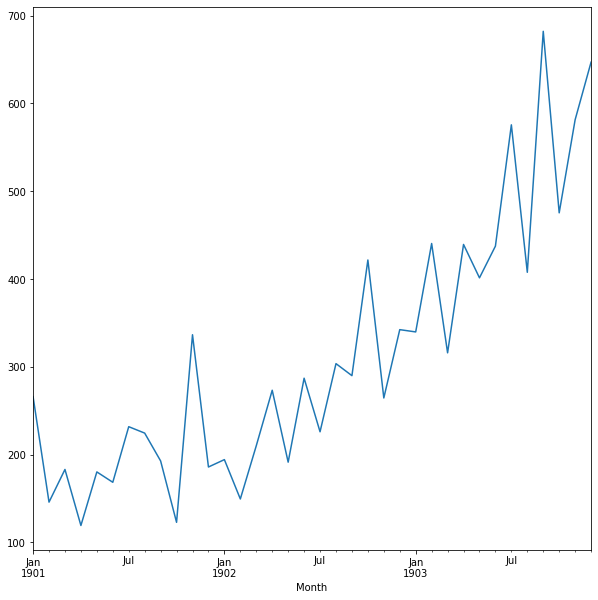

In [414]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize = (10,10))
df.plot()

In [426]:
#Upsampling: Increasing the sampling frequency from months to days


def parser(x):
    return datetime.strptime("190"+x ,"%Y-%m")

df = pd.read_csv("shampoo.csv",header = 0, index_col = 0, parse_dates = [0], squeeze = True, date_parser = parser)

upsampled = df.resample("D").interpolate(method = "linear")


You should add parse_dates=True, or parse_dates=['column name'],
here in our example its column 0 hence we put [0] as parameter for parse_dates. 
when reading,thats usually enough to magically parse it. But there are always weird formats which need to be 
defined manually.In such a case you can also add a date parser function, which is the most flexible way possible.
here in our example the function parser we defined will parse the dates into an appropriate format and we mention
it in date_parser.

In [427]:
upsampled

Month
1901-01-01    266.000000
1901-01-02    262.125806
1901-01-03    258.251613
1901-01-04    254.377419
1901-01-05    250.503226
                 ...    
1903-11-27    638.153333
1903-11-28    640.340000
1903-11-29    642.526667
1903-11-30    644.713333
1903-12-01    646.900000
Freq: D, Name: Sales, Length: 1065, dtype: float64

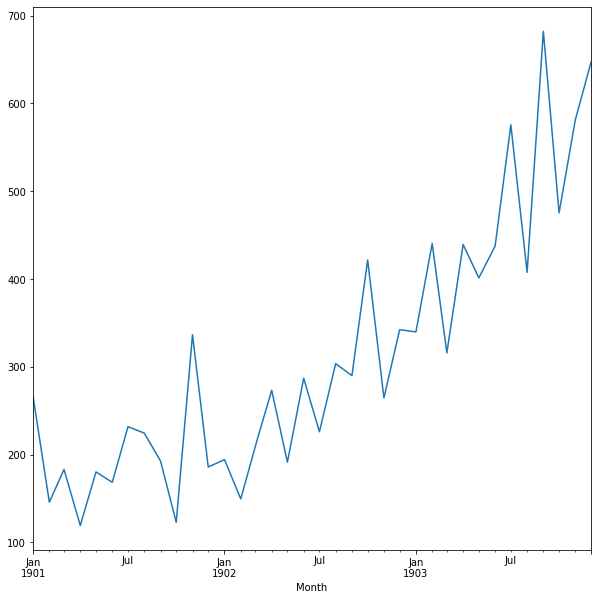

In [430]:
fig = plt.figure(figsize = (10,10))

upsampled.plot()

#which is sample as df.plot without any upsampling.


We can see that the resample() function has created the rows by putting NaN values in the new values. 
We can see we still have the sales volume on the first of January and February from the original data.

Next, we can interpolate the missing values at this new frequency.

The Series Pandas object provides an interpolate() function to interpolate missing values,
and there is a nice selection of simple and more complex interpolation functions. You may have domain knowledge to help choose how values are to be interpolated.

A good starting point is to use a linear interpolation. This draws a straight line between available data, 
in this case on the first of the month, and fills in values at the chosen frequency from this line.


In [432]:
def parser(x):
    return datetime.strptime("190"+x ,"%Y-%m")

df = pd.read_csv("shampoo.csv",header = 0, index_col = 0, parse_dates = [0], squeeze = True, date_parser = parser)

upsampled = df.resample("D").interpolate(method = "spline", order = 2)


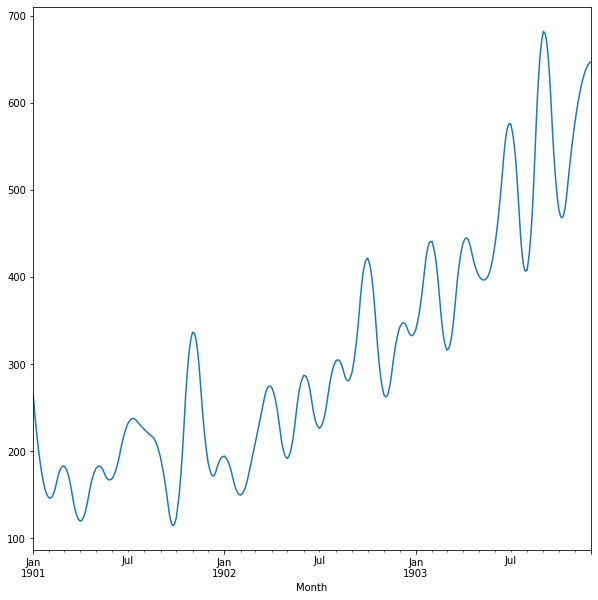

In [433]:
fig = plt.figure(figsize = (10,10))

upsampled.plot()

Another common interpolation method is to use a polynomial or a spline to connect the values.

This creates more curves and can look more natural on many datasets. Using a spline interpolation
requires you specify the order (number of terms in the polynomial); in this case, an order of 2 is just fine.

In [445]:
def parser(x):
    return datetime.strptime("190"+x ,"%Y-%m")


df = pd.read_csv("shampoo.csv", header = [0], index_col = 0, parse_dates = [0], date_parser = parser)
df_resample = df.resample("Q").sum()       #inorder to downsample we group or aggregate data 
                                            #after grouping into lower frequency 
downsampled = df_resample.interpolate("linear")

<Figure size 720x720 with 0 Axes>

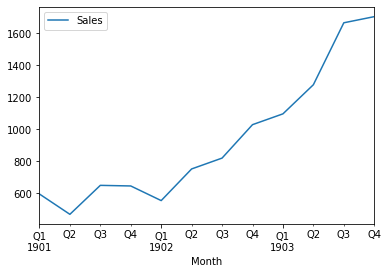

In [447]:
fig = plt.figure(figsize = (10,10))



downsampled.plot()

About time series resampling and the difference and reasons between downsampling and upsampling observation frequencies.
How to upsample time series data using Pandas and how to use different interpolation schemes.
How to downsample time series data using Pandas and how to summarize grouped data.


# Moving Windows Functions

It is statistics and other functions evaluated over a sliding window or with exponentially decaying weights. 
This can be useful for smoothing noisy or gappy data.

In [544]:
from pandas_datareader import data, wb
start = datetime(2010, 1, 1)
end = datetime(2022, 1, 1)

In [616]:
AAPL = data.DataReader("AAPL", 'yahoo', start, end)
MSFT = data.DataReader("MSFT", "yahoo", start, end)
XOM = data.DataReader("XOM", "yahoo", start, end)
SPX = data.DataReader("SPX", "yahoo", start, end)
close_px = pd.concat([AAPL,MSFT,XOM],axis = 1, keys = ["AAPL", "MSFT", "XOM"])

In [619]:
SPX = SPX["Close"]

In [617]:
close_px

AAPL                                                   \
                  High         Low        Open       Close       Volume   
Date                                                                      
2010-01-04    7.660714    7.585000    7.622500    7.643214  493729600.0   
2010-01-05    7.699643    7.616071    7.664286    7.656429  601904800.0   
2010-01-06    7.686786    7.526786    7.656429    7.534643  552160000.0   
2010-01-07    7.571429    7.466071    7.562500    7.520714  477131200.0   
2010-01-08    7.571429    7.466429    7.510714    7.570714  447610800.0   
...                ...         ...         ...         ...          ...   
2021-12-27  180.419998  177.070007  177.089996  180.330002   74919600.0   
2021-12-28  181.330002  178.529999  180.160004  179.289993   79144300.0   
2021-12-29  180.630005  178.139999  179.330002  179.380005   62348900.0   
2021-12-30  180.570007  178.089996  179.470001  178.199997   59773000.0   
2021-12-31  179.229996  177.259995  178.089996  177.570007   64062300.0   

                              MSFT                                      \
             Adj Close        High         Low        Open       Close   
Date                                                                     
2010-01-04    6.526021   31.100000   30.590000   30.620001   30.950001   
2010-01-05    6.537302   31.100000   30.639999   30.850000   30.959999   
2010-01-06    6.433317   31.080000   30.520000   30.879999   30.770000   
2010-01-07    6.421426   30.700001   30.190001   30.629999   30.450001   
2010-01-08    6.464117   30.879999   30.240000   30.280001   30.660000   
...                ...         ...         ...         ...         ...   
2021-12-27  179.586868  342.480011  335.429993  335.459991  342.450012   
2021-12-28  178.551132  343.809998  340.320007  343.149994  341.250000   
2021-12-29  178.640778  344.299988  339.679993  341.299988  341.950012   
2021-12-30  177.465637  343.130005  338.820007  341.910004  339.320007   
2021-12-31  176.838242  339.359985  335.850006  338.510010  336.320007   

                                          XOM                        \
                Volume   Adj Close       High        Low       Open   
Date                                                                  
2010-01-04  38409100.0   23.749817  69.260002  68.190002  68.720001   
2010-01-05  49749600.0   23.757484  69.449997  68.800003  69.190002   
2010-01-06  58182400.0   23.611694  70.599998  69.339996  69.449997   
2010-01-07  50559700.0   23.366137  70.059998  69.419998  69.900002   
2010-01-08  51197400.0   23.527277  69.750000  69.220001  69.690002   
...                ...         ...        ...        ...        ...   
2021-12-27  19947000.0  340.227112  61.950001  60.419998  60.930000   
2021-12-28  15661500.0  339.034882  62.310001  61.400002  61.910000   
2021-12-29  15042000.0  339.730377  61.599998  60.919998  61.480000   
2021-12-30  15994500.0  337.117401  61.599998  60.770000  61.220001   
2021-12-31  18000800.0  334.136902  61.470001  60.700001  60.740002   

                                              
                Close      Volume  Adj Close  
Date                                          
2010-01-04  69.150002  27809100.0  42.336407  
2010-01-05  69.419998  30174700.0  42.501694  
2010-01-06  70.019997  35044700.0  42.869053  
2010-01-07  69.800003  27192100.0  42.734379  
2010-01-08  69.519997  24891800.0  42.562916  
...               ...         ...        ...  
2021-12-27  61.889999  12593700.0  60.007717  
2021-12-28  61.689999  12781000.0  59.813797  
2021-12-29  61.150002  12733600.0  59.290222  
2021-12-30  60.790001  11940300.0  58.941170  
2021-12-31  61.189999  14072000.0  59.329002  

[3021 rows x 18 columns]

In [571]:

s1 = close_px["AAPL"]["Close"]
s2 = close_px["MSFT"]["Close"]
s3 = close_px["XOM"]["Close"]

In [572]:
close_red = pd.concat([s1, s2, s3], axis = 1, keys = ["AAPL", "MSFT", "XOM"])
close_red[:20]

,AAPL,MSFT,XOM
Date,,,
2010-01-04,7.643214,30.950001,69.150002
2010-01-05,7.656429,30.959999,69.419998
2010-01-06,7.534643,30.770000,70.019997
2010-01-07,7.520714,30.450001,69.800003
2010-01-08,7.570714,30.660000,69.519997
2010-01-11,7.503929,30.270000,70.300003
2010-01-12,7.418571,30.070000,69.949997
2010-01-13,7.523214,30.350000,69.669998
2010-01-14,7.479643,30.959999,69.680000


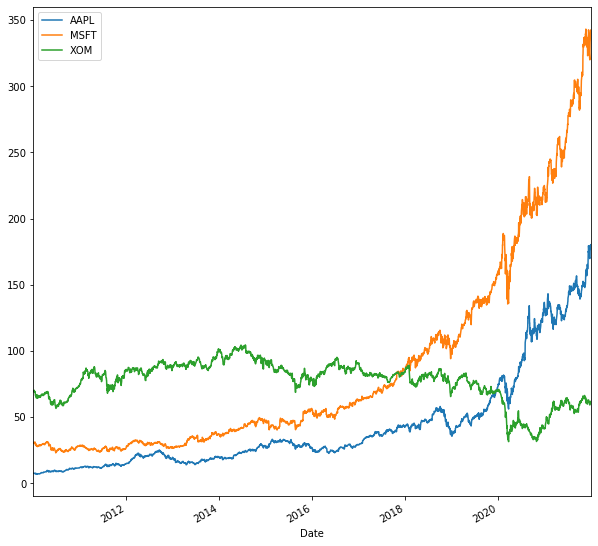

In [573]:
close_red.plot(figsize = (10,10))

In [574]:
close = close_red.resample("B").ffill()

In [575]:
close[:10]

,AAPL,MSFT,XOM
Date,,,
2010-01-04,7.643214,30.950001,69.150002
2010-01-05,7.656429,30.959999,69.419998
2010-01-06,7.534643,30.770000,70.019997
2010-01-07,7.520714,30.450001,69.800003
2010-01-08,7.570714,30.660000,69.519997
2010-01-11,7.503929,30.270000,70.300003
2010-01-12,7.418571,30.070000,69.949997
2010-01-13,7.523214,30.350000,69.669998
2010-01-14,7.479643,30.959999,69.680000


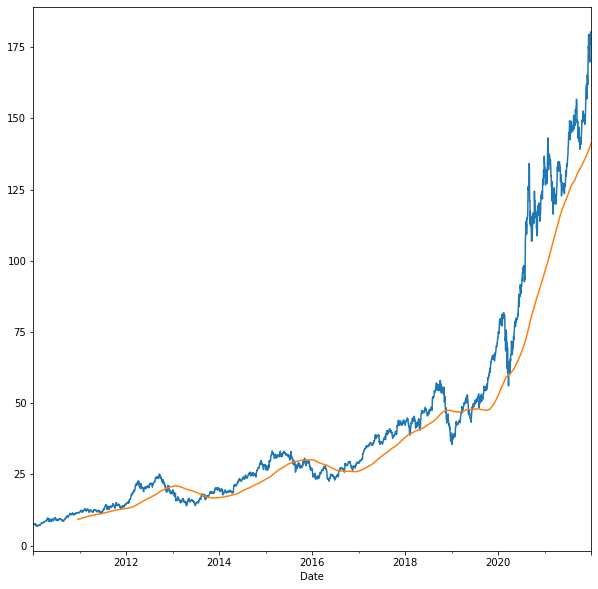

In [556]:
close.AAPL.plot(figsize = (10,10))
close.AAPL.rolling(250).mean().plot()

In [565]:
appl_mean250 = close.AAPL.rolling(250).mean()
appl_mean250[:251]

Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
                ...   
2010-12-14         NaN
2010-12-15         NaN
2010-12-16         NaN
2010-12-17    9.183306
2010-12-20    9.198763
Freq: B, Name: AAPL, Length: 251, dtype: float64

In [560]:
appl_std250 = close.AAPL.rolling(250, min_periods = 10).std()

Inorder to have fewer window periods at the beginning of time Series to be missing, we can use min_periods = 10

In [562]:
appl_std250[:50]

Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
2010-01-11         NaN
2010-01-12         NaN
2010-01-13         NaN
2010-01-14         NaN
2010-01-15    0.091958
2010-01-18    0.100566
2010-01-19    0.108315
2010-01-20    0.104348
2010-01-21    0.103236
2010-01-22    0.153776
2010-01-25    0.159654
2010-01-26    0.157157
2010-01-27    0.152765
2010-01-28    0.168256
2010-01-29    0.209624
2010-02-01    0.227698
2010-02-02    0.237882
2010-02-03    0.238644
2010-02-04    0.255145
2010-02-05    0.260061
2010-02-08    0.266351
2010-02-09    0.267751
2010-02-10    0.270187
2010-02-11    0.267766
2010-02-12    0.264125
2010-02-15    0.260616
2010-02-16    0.256386
2010-02-17    0.252447
2010-02-18    0.248633
2010-02-19    0.245236
2010-02-22    0.242438
2010-02-23    0.242011
2010-02-24    0.239214
2010-02-25    0.236153
2010-02-26    0.233241
2010-03-01    0.232521
2010-03-02    0.231630
2010-03-03    0.231033
2010-0

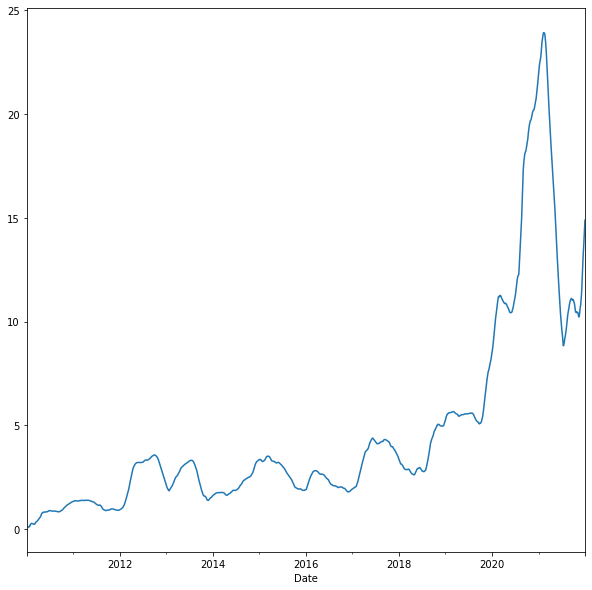

In [567]:
appl_std250.plot(figsize = (10,10))

In [568]:
expanding_mean = close.AAPL.expanding().mean()

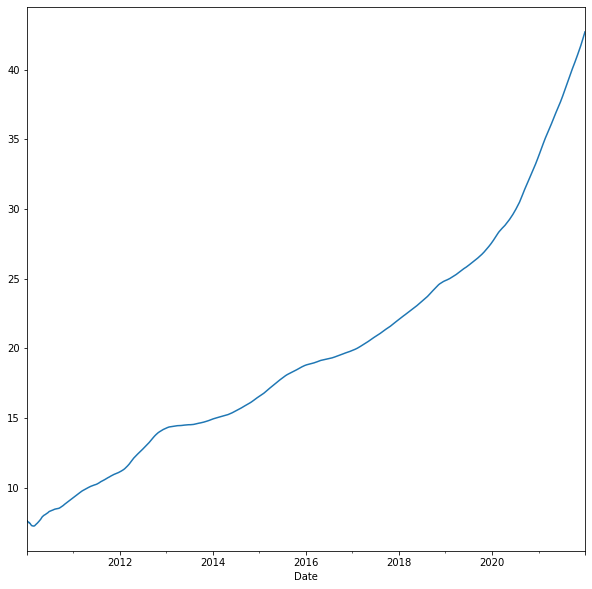

In [569]:
expanding_mean.plot( figsize = (10,10))

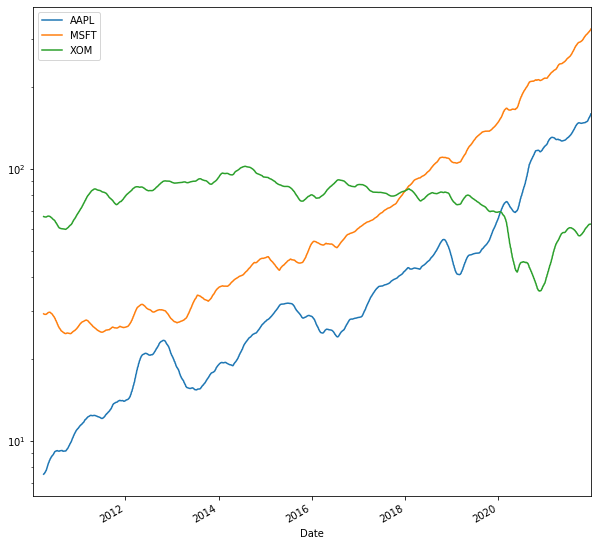

In [577]:
close_red.rolling(60).mean().plot( figsize = (10,10) , logy = True) # here 60 is a set number of periods.
                                                                    # These are the same strings that can be used to pass for resample

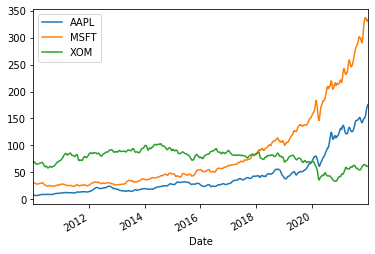

In [580]:
  
#rolling fn can also accept a fixed size time offset rather than set number of periods
close_red.rolling("20D").mean().plot()

# Exponentially Weighted Functions

Alternative to using a static window size with equally weighted observations is to specify "DECAY FACTOR" to give more weight to more recent observations.

There are couple of ways to specify the decay factor.
A popular one is using "SPAN", which result comparable to a simple moving window function with window size equal to the "SPAN". 

Pandas has the ewm operator to go along with rolling or expanding.
Here's is an ex comparing 30-day moving avg of Apple's stock price with an EW moving avg with span = 30. 

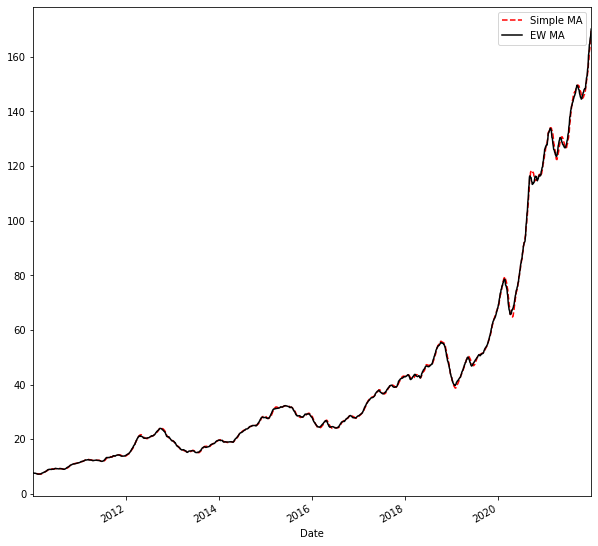

In [635]:
fig = plt.figure( figsize = (10,10))

aapl_px = close_red.AAPL["2010" : "2022"]

ma30 = aapl_px.rolling(30, min_periods = 20).mean()

ewma30 = aapl_px.ewm(span = 30).mean()
ma30.plot(style = "r--", label = "Simple MA")
ewma30.plot(style = "k-", label = "EW MA")   #Moving Average
plt.legend()

In [636]:
SPX

Date
2010-01-04    0.05159
2010-01-05    0.06190
2010-01-06    0.05933
2010-01-07    0.05417
2010-01-08    0.05159
               ...   
2018-01-24    0.05500
2018-01-25    0.05500
2018-01-26    0.05000
2018-01-29    0.05000
2018-01-30    0.05000
Name: Close, Length: 2016, dtype: float64

In [637]:
spx_rets = SPX.pct_change()

In [638]:
returns = close_red.pct_change()
returns

,AAPL,MSFT,XOM
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,0.001729,0.000323,0.003905
2010-01-06,-0.015906,-0.006137,0.008643
2010-01-07,-0.001849,-0.010400,-0.003142
2010-01-08,0.006648,0.006897,-0.004012
...,...,...,...
2021-12-27,0.022975,0.023186,0.014258
2021-12-28,-0.005767,-0.003504,-0.003232
2021-12-29,0.000502,0.002051,-0.008753


In [639]:
corr = returns.AAPL.rolling(125, min_periods = 100).corr(spx_rets)

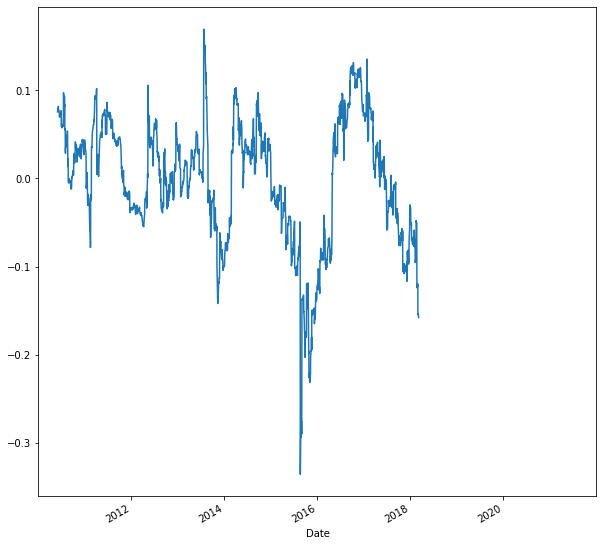

In [640]:
corr.plot( figsize = (10,10))

In [641]:
corr = returns.rolling(125, min_periods = 100).corr(spx_rets)

In [642]:
import plotly
import cufflinks as cf
cf.go_offline()


corr.iplot()

# User-Defined Moving Window Functions

The apply method on rolling and related methods provides a means to apply an array of functions of your own devising over a moving window. 

The only requirement is that the function produce a single value(a reduction) from each piece of the array.

ex. we can calculate sample quantile rolling(...).quantile(q)

We might be interested in percentile rank of a particular value over the sample. 
The scipy.stats.percentileofscore function does just this

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning



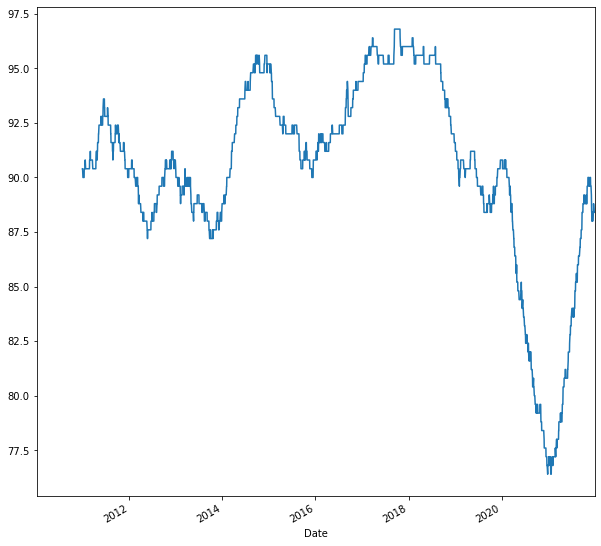

In [645]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x : percentileofscore(x, 0.02)

result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot(figsize= (10,10))

Percentile rank of 2% AAPL return over one-year window